In [246]:
import warnings
warnings.filterwarnings('ignore')
#忽略warnings（在导入数据时，有时会出现warnings，但不要因为这件事就立即删除）

In [247]:
import pandas as pd
#导入数据分析包【pandas】，并简称为pd

In [3]:
pip install panda


The following command must be run outside of the IPython shell:

    $ pip install panda

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#导入test set和train set

In [5]:
train_df.shape,test_df.shape
#展示test set和train set，（行数，列数）
#为什么训练集会比测试集多一列，y值的那一列，需要用x回归得出y值

((891, 12), (418, 11))

In [6]:
import matplotlib.pyplot as plt
#导入图形绘制包

In [7]:
print(train_df.columns.values)
#读取训练集的表头

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
print(test_df.columns.values)
#读取测试集的表头

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [12]:
train_df.head()
#预览数据，前五行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()
#由此可见，该数据集的划分是直接以编号划分的

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.info()
#训练集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
test_df.info()
#测试集基本信息查询

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
train_df.isnull().sum()
#查看空值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test_df.isnull().sum()
#查看空值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
train_df.describe()
#训练集的基本数据信息

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test_df.describe()
#测试集的基本数据信息
#该情况下只会对数值数据进行处理，忽略分类数据

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
#以下是用图表来了解数据
#之前已经导入了数据包，并且重命名为plt

Text(0, 0.5, 'Count')

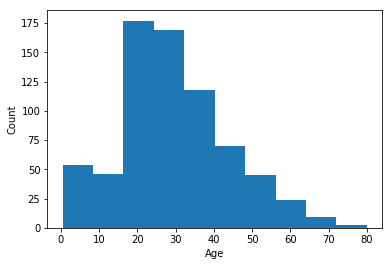

In [21]:
plt.hist(train_df['Age'])#绘制直方图
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值
#不处理空值会报错

Text(0, 0.5, 'Count')

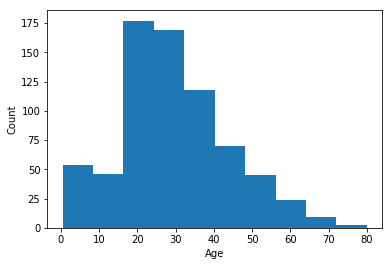

In [22]:
plt.hist(train_df['Age'].dropna())#绘制直方图,    「 .dropna() 」去空值
plt.xlabel('Age')#x轴为Age
plt.ylabel('Count')#y轴为数值

Text(0, 0.5, 'Count')

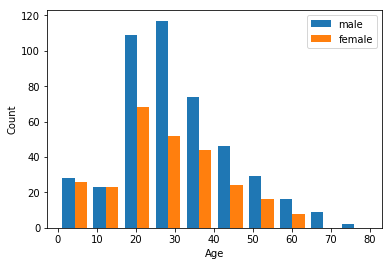

In [23]:
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
#类比r语言，train_df[train_df['Sex'] == 'male'].Age-->指的是训练集中sex为男的情况下的人的年龄
plt.legend(['male','female']) #标上图例
plt.xlabel('Age')
plt.ylabel('Count')

In [24]:
pd.crosstab(train_df['Survived'],train_df['Sex'])
#交叉表crosstab生成，使用pandas包（存活人数和性别）

Sex,female,male
Survived,,
0,81,468
1,233,109


In [25]:
pd.crosstab(train_df['Survived'],train_df['Pclass'])
#存活人数和仓级的关系

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [26]:
train_df.groupby(['Embarked','Survived']).size()
#类比sql的groupby，size()-->count(*)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [27]:
#在python中使用sql语言

In [28]:
 pip install -U pandasql


The following command must be run outside of the IPython shell:

    $ pip install -U pandasql

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [8]:
from pandasql import sqldf
#对python中对pandas进行sql查询

In [32]:
ql ="""
select Survived,Parch,count(*)
from train_df
group by Survived,Parch
"""
sqldf(ql)


,Survived,Parch,count(*)
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40


In [33]:
#python day2
#数据清理及数据可视化

In [9]:
import numpy as np
#numpy数据包-->开源的，可以用来储存和处理大型矩阵的数值计算扩展包

In [10]:
train_df.tail()
#浏览训练集末尾五行（默认值）
#此处必须先导入pandas数据包

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train_df.isnull().sum()
#查询空值，r语言中空值查询代码是is.na 我还记得可真感动

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#处理空值
train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')
#fillna()-->用某某值取代空值
#均值取代  df['ColA'].fillna(value=df['ColA'].mean()
#向前，用前序数值补空值     df['ColA'].fillna(method='ffill'
#向后，用后续数值补空值     df['ColA'].fillna(method='ffill'
#https://medium.com/@zector1030/pandas-fillna-%E7%AF%84%E4%BE%8B-5d33819fb7b8
#上述网站是补空值的几种方法
s = train_df['Age'].value_counts(normalize = True)
#.value_counts()计数相当于sql中的count(*)，默认降序排列
#后接 normalize = True 为计数占比
#后接 ascending = True 升序排列

In [13]:
#s = train_df['Age'].interpolate(method='linear', inplace=True)
#插值，不知道是干嘛的

In [14]:
missing_age = train_df['Age'].isnull()
#判断年龄是否为空值
train_df.loc[missing_age,'Age'] = np.random.choice(s.index,size = len(train_df[missing_age]),p=s.values)
#给缺失的年龄值赋值，
#numpy.random随机赋值，赋值规则
#s.index  取值范围
#len()  平均值的长度为缺少的值的多少
#p = 概率大小，刚刚slist中算得占比

In [15]:
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)
#drop() 删去行，
#drop(  , axis = 1) 删除列

In [16]:
# 使用正则表达式将Title中的称呼提取出来，如Mr.
#http://www.runoob.com/python/python-reg-expressions.html
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand = False)

In [17]:
train_df.Title.unique()
#unique(),相当于sql中的distinct，只出现一次

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
pd.crosstab(train_df['Title'], train_df['Survived'])
#交叉表生成，Title X Survived

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [19]:
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
#把出现频率较低的title换成rare
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

In [20]:
pd.crosstab(train_df['Title'], train_df['Survived'])
#新交叉表生成，Title X Survived

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [21]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#mean计算生还率

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr": 1 , "Miss": 2 ,"Mrs": 3,"Mrs": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
#??? = {??:??} 定义词典
#??['??'] = ??['??'].map(???) 映射，相当于替换值
train_df['Title'] = train_df['Title'].fillna(0)
#补空值为0

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [24]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1 #找出或者的人
train_df['IsAlone'].loc[train_df['Family_size'] > 1] = 0 #活着的人里面有家人的就不alone了，所以定义为0
#family size 的创建
#判断是否单身IsAlone
#loc() 提取行数据，is alone的情况下 family size > 1的为0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

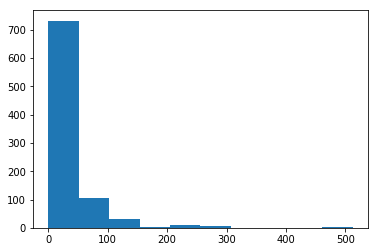

In [25]:
plt.hist(train_df['Fare'])
#票价直方图

In [26]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
#依据票价四等分

In [27]:
#利用cut把数据分成均等的五份
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)
#预览可以看到区间

In [28]:
# 调用机器学习库scikit-learn中的LabelEncoder，标签标准化
#LabelEncoder是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码。
from sklearn.preprocessing import LabelEncoder

In [29]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

In [30]:
#train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [31]:
for label in labels:
    # 输出每一个label和它的数据类型
    print (label,type(label))
    # 新的标签名在原标签名的基础上加上_Code
    new_label = label + '_Code'
    # 调用LabelEncoder的fit_transform方法对原train_df[label]先拟合再标准化
    train_df[new_label] = label_encode.fit_transform(train_df[label])
    #fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的词。 
    #fit_transform(y)：相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [32]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0,2,0,"(-0.001, 7.91]","(16.336, 32.252]",1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4.0,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0,1,1,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4.0,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0,1,1,"(7.91, 14.454]","(32.252, 48.168]",1,2,2,1


In [33]:
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [34]:
#载入seaborn包并以sns简化命名，当你使用数据科学中的Python时，你很有可能已经用了Matplotlib,一个供你创建高质量图像的2D库。
#另一个免费的可视化库就是Seaborn,他提供了一个绘制统计图形的高级接口。Seaborn是比Matplotlib更高级的免费库，特别地以数据可视化为目标，
#Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
#用Matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。
import seaborn as sns

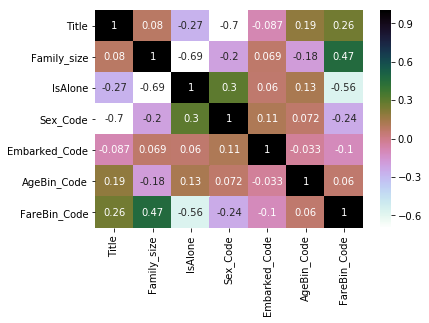

In [35]:
# 在上面，将众多属性名聚在一个list命名为new_feature
# 此处使用seaborn的heatmap方法，画出new_feature中各种特征两两之间的相似度热力图
sns.heatmap(train_df[new_feature].corr(),annot=True,cmap='cubehelix_r')

In [36]:
作业

NameError: name '作业' is not defined

In [37]:
#清洗测试集
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
test_df = test_df.drop(['Cabin'],axis = 1)
#Cabin 空值太多所以删除这一列

In [39]:
#数据缺失少的可以用ffill的方法
test_df['Fare'] = test_df['Fare'].fillna(method = 'ffill')

In [40]:
#age用概率的方法
s = test_df['Age'].value_counts(normalize = True)

In [41]:
missing_age = test_df['Age'].isnull()

In [42]:
test_df.loc[missing_age,'Age'] = np.random.choice(s.index,size=len(test_df[missing_age]),p=s.values) 

In [43]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.',expand = False)

In [44]:
test_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [45]:
#pd.crosstab(test_df['Title'],test_df['Survived'])

In [46]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [47]:
test_df['Title'] = test_df['Title'].replace(['Col','Don','Dr','Dona','Rev'],'Rare')
#把出现频率较低的title换成rare
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

In [48]:
title_mapping = {"Mr": 1 , "Miss": 2 ,"Mrs": 3,"Master": 4, "Rare": 5}
test_df['Title'] = test_df['Title'].map(title_mapping)
#??? = {??:??} 定义词典
#??['??'] = ??['??'].map(???) 映射，相当于替换值
test_df['Title'] = test_df['Title'].fillna(0)

In [49]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [50]:
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = 1 #找出或者的人
test_df['IsAlone'].loc[test_df['Family_size'] > 1] = 0 #活着的人里面有家人的就不alone了，所以定义为0
#family size 的创建

In [51]:
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4)

In [52]:
test_df['AgeBin'] = pd.cut(test_df['Age'], 5)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

In [55]:
for label in labels:
    # 输出每一个label和它的数据类型
    print (label,type(label))
    # 新的标签名在原标签名的基础上加上_Code
    new_label = label + '_Code'
    # 调用LabelEncoder的fit_transform方法对原train_df[label]先拟合再标准化
    test_df[new_label] = label_encode.fit_transform(test_df[label])
    #fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的词。 
    #fit_transform(y)：相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [56]:
test_

NameError: name 'test_' is not defined

In [57]:
original_feature = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [58]:
import seaborn as sns

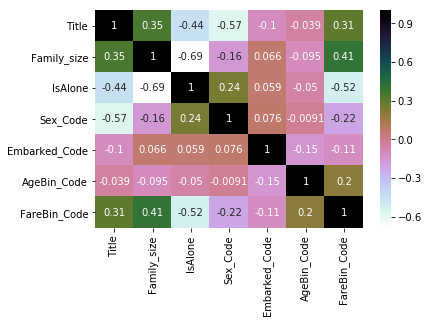

In [59]:
sns.heatmap(test_df[new_feature].corr(),annot=True,cmap='cubehelix_r')

In [ ]:
day3
数据清理
特征选择及数据划分（测试集和训练集）
理解选择模型

In [150]:
from sklearn.preprocessing import OneHotEncoder
#独热编码

In [151]:
enc = OneHotEncoder()
#创建对象，并命名为enc

In [152]:
oh_features=['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
#创建list，并存放进行编码的属性

In [153]:
enc.fit(train_df[oh_features])
#进行独热编码


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [154]:
enc.categories_

[array([0., 1., 2., 4., 5.]),
 array([0., 1.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.])]

In [155]:
#pip install --upgrade scikit-learn

In [66]:
#pip install -U numpy scipy scikit-learn

In [67]:
#pip install --upgrade pip

In [156]:
enc_res = enc.transform(train_df[oh_features])

In [69]:
# 创建一个名为onehot_features的list,并存放要进行编码的属性
#onehot_features = ['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 对这些属性进行独热编码并且求得train_df[onehot_features]的均值等属性
#enc.fit(train_df[onehot_features])

In [157]:
print(enc_res.toarray())
#查看enc_res的值

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [158]:
#查看数据的维度
print(enc_res.toarray().shape)

(891, 19)


In [160]:
#数据划分

In [161]:
original_features = ['PassengerId','Pclass', 'Name', 'Sex', 'Age' ,'SibSp', 'Parch','Ticket','Fare', 'Cabin', 'Embarked']
new_features = ['Title','Family_size','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
#创建了o_f和n_f两个list

In [162]:
final_features = ['Pclass','Age','SibSp','Parch','Fare','Title','Family_size',
                  'IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 删去难以运用的变量&重复的变量
onehot_final = list(set(final_features) - set(oh_features))
#特征值的加减法如上

In [163]:
oh_features

['Title', 'Sex_Code', 'Embarked_Code', 'AgeBin_Code', 'FareBin_Code']

In [199]:
all_x = train_df[final_features]
y = train_df['Survived']
#引入所有影响因素x值
#并且进行查看
all_x.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Family_size,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,3,22.0,1,0,7.2500,1.0,2,0,1,2,1,0
1,1,38.0,1,0,71.2833,4.0,2,0,0,0,2,3
2,3,26.0,0,0,7.9250,2.0,1,1,0,2,1,1
3,1,35.0,1,0,53.1000,4.0,2,0,0,2,2,3
4,3,35.0,0,0,8.0500,1.0,1,1,1,2,2,1


In [200]:
# 将转换为数组的独热编码的值存放到onehot_added里
onehot_added = pd.DataFrame(enc_res.toarray())
# 使用pandas的concat函数将原数据中onehot_final这些列和onehot_added合并起来，concat函数专门用于连接两个或多个数组
# axis指定了合并的轴，此处axis=1意为逐列合并，若axis=0则为逐行合并；合并后的函数赋值为新的数据集all_x_2
all_x_2 = pd.concat([train_df[onehot_final],onehot_added],axis = 1)

In [201]:
all_x.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title            0
Family_size      0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [202]:
#终于划分测试集和训练集了

In [203]:
# 从scikit-learn中引入train_test_split
from sklearn.model_selection import train_test_split

In [204]:
# 对all_x进行数据集划分为训练集和测试集：xTrain为训练集数据，xTest为测试集数据
# y为数据集的标签（即该乘客是否存活），yTrain对应了训练集的标签，yTest对应了测试集的标签
# test_size=0.2表示测试集占总数据集的20%
xTrain, xTest, yTrain, yTest = train_test_split(all_x, y, test_size = 0.2, random_state = 0)

In [205]:
# 查看训练集和测试集的数据量
xTrain.shape, xTest.shape

((712, 12), (179, 12))

In [206]:
# 查看训练集标签数和测试集标签数
yTrain.shape,yTest.shape

((712,), (179,))

In [207]:
# 计算训练集中乘客存活率平均值和测试集中乘客存活率平均值
yTrain.mean(),yTest.mean()

(0.38342696629213485, 0.3854748603351955)

In [208]:
# 同样的对all_进行数据集划分
x2Train, x2Test, y2Train, y2Test = train_test_split(all_x_2, y, test_size = 0.2, random_state = 0)

In [209]:
from PIL import Image

In [132]:
#作业
#自行比较以下指标

In [174]:
xTrain.describe()

,Pclass,Age,SibSp,Parch,Fare,Title,Family_size,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
count,712.000000,712.000000,712.000000,712.000000,712.00000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.317416,29.994846,0.529494,0.391854,31.86295,1.640449,1.921348,0.603933,0.653090,1.543539,1.370787,1.501404
std,0.833767,14.775053,1.140842,0.821368,50.13531,1.169199,1.664385,0.489423,0.476321,0.783668,0.912572,1.120075
min,1.000000,0.670000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.91770,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.750000
50%,3.000000,29.000000,0.000000,0.000000,14.45625,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.500000
75%,3.000000,38.000000,1.000000,0.000000,31.27500,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000
max,3.000000,80.000000,8.000000,6.000000,512.32920,5.000000,11.000000,1.000000,1.000000,2.000000,4.000000,3.000000


In [175]:
xTest.describe()

,Pclass,Age,SibSp,Parch,Fare,Title,Family_size,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.273743,29.883631,0.497207,0.340782,33.561615,1.888268,1.837989,0.597765,0.625698,1.491620,1.357542,1.480447
std,0.846628,14.235502,0.938408,0.742802,48.008223,1.344496,1.394817,0.491724,0.485300,0.830383,0.858262,1.113456
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.500000,0.000000,0.000000,7.972900,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000
50%,3.000000,28.000000,0.000000,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,3.000000,40.000000,1.000000,0.000000,30.500000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,3.000000,64.000000,5.000000,5.000000,263.000000,5.000000,8.000000,1.000000,1.000000,2.000000,3.000000,3.000000


In [135]:
# 如何选择适合的机器学习模型，这里的函数目的是给大家引入一个模型图的概括表！这个对于各位有志于从事机器学习和数据分析行业的同学来讲是个大大的福利
# 在这张表里你可以全面地看到非监督学习和监督学习两种模式下最常用的Model们，收藏好哦！
#Image(filename='models.png') 

In [ ]:
#day4

In [ ]:
训练模型
交叉验证

In [176]:
#训练模型，根据第三讲最后所说的三个模型分别冲sklearn中调取三个包裹
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #随机森林

In [177]:
logr = LogisticRegression() #初始化模型，存入变量
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier() 
#以上是接下来要用到的三个模型
models = [logr,dtree,rf] #放到models的list可以一起使用

In [178]:
logr.fit(xTrain,yTrain)
#fit()训练数据
#class_weight在两种错误预测的结果但造成印象不同但情况下，对该参数调整
#out即模型

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [179]:
y_pred_test = logr.predict(xTest)
y_pred_train = logr.predict(xTrain)
#predict() 预测因变量y

In [180]:
np.mean(y_pred_test == yTest)
#求精度，== 为判断是否相等，如果预测值=观察之就返回true，不相等则返回false算均值
#数字越大精度越高

0.8044692737430168

In [181]:
np.mean(y_pred_train == yTrain)

0.7963483146067416

In [182]:
#test>train 由于数据是训练集的所以模型更偏向训练集数据

In [183]:
#对每一个模型，分别测试训练集和测试集的精确度
for model in models:
    print ('\nThe current model is', model)
    model.fit(xTrain, yTrain)
    print ('\nTraining accuracy is',np.mean(model.predict(xTrain) == yTrain))
    print ('\nTesting accuracy is',np.mean(model.predict(xTest) == yTest))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Training accuracy is 0.7963483146067416

Testing accuracy is 0.8044692737430168

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training accuracy is 0.9873595505617978

Testing accuracy is 0.8156424581005587

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            

In [184]:
LogisticRegression：
Training accuracy is 0.7963483146067416
Testing accuracy is 0.8044692737430168
DecisionTreeClassifier：
Training accuracy is 0.9873595505617978
Testing accuracy is 0.7988826815642458 #可能存在过拟合现象
RandomForestClassifier：
Training accuracy is 0.9789325842696629
Testing accuracy is 0.8156424581005587

SyntaxError: invalid character in identifier (<ipython-input-184-cb5a196422a0>, line 1)

In [185]:
#对第二组数据进行相同的操作，每一个模型，分别测试训练集和测试集的精确度
for model in models:
    print ('\nThe current model is', model)
    model.fit(x2Train, y2Train)
    print ('\nTraining accuracy is',np.mean(model.predict(x2Train) == y2Train))
    print ('\nTesting accuracy is',np.mean(model.predict(x2Test) == y2Test))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Training accuracy is 0.8356741573033708

Testing accuracy is 0.8156424581005587

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training accuracy is 0.9873595505617978

Testing accuracy is 0.8100558659217877

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            

In [186]:
#交叉验证是机器学习领域常用的验证模型是否优秀的方法；简而言之就是把数据切分成几个部分然后在训练集和测试集中交换使用
#比如这次在训练集中用到的数据，下一次会放进测试集来使用，因此被称为 交叉
#简单的交叉验证会直接按百分比来划分训练集和测试集，更难一些的方法是K-Fold，我们会使用这个方法来进行交叉验证
#K-Fold其实就是把数据集切成K份，将每一份儿小数据集分别做一次验证集，每次剩下的K-1组份儿数据作为训练集，得到K个模型
#
#从sklearn中调用k次交叉验证包
from sklearn.model_selection import KFold

In [238]:
def CVKFold(k,X,y,Model): #定义函数
    np.random.seed(1) 
    train_accuracy = [0 for i in range(k)]
    test_accuracy = [0 for i in range(k)]
    idx = 0
    kf = KFold(n_splits = k,shuffle = True)
    for train_index,test_index in kf.split(X):
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        if Model == "Logit":
            clf = LogisticRegression(random_state = 0)
        if Model == "RForest":
            clf = RandomForestClassifier(random_state = 0)
        clf = clf.fit(X_train,y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_accuracy[idx] = np.mean(y_train_pred == y_train)
        test_accuracy[idx] = np.mean(y_test_pred == y_test)
        idx += 1
        
    print(train_accuracy)
    print(test_accuracy)
    return train_accuracy,test_accuracy

In [234]:
#定义k次交叉验证函数
def CVKFold(k, X, y, Model):
    np.random.seed(1)
    train_accuracy = [0 for i in range(k)] 
    test_accuracy = [0 for i in range(k)] 
    idx = 0
    kf = KFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        if Model == "Logit":
            clf = LogisticRegression(random_state = 0)           
        if Model == "RForest":
            clf = RandomForestClassifier(random_state = 0)
        clf = clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_accuracy[idx] = np.mean(y_train_pred == y_train)
        test_accuracy[idx] = np.mean(y_test_pred == y_test)
        idx += 1

    print (train_accuracy)
    print (test_accuracy)
    return train_accuracy, test_accuracy

In [239]:
#应用逻辑回归模型，将数据分为10份，每次取一个样本作为验证数据，剩下k-1个样本作为训练数据
train_acc,test_acc = CVKFold(10,all_x,y,"Logit")

[0.8014981273408239, 0.7905236907730673, 0.8017456359102244, 0.8042394014962594, 0.7955112219451371, 0.7942643391521197, 0.7830423940149626, 0.7942643391521197, 0.7992518703241895, 0.7942643391521197]
[0.7888888888888889, 0.8202247191011236, 0.7528089887640449, 0.7191011235955056, 0.8089887640449438, 0.7640449438202247, 0.8764044943820225, 0.7752808988764045, 0.8089887640449438, 0.7865168539325843]


In [210]:
all_x.shape

(891, 12)

In [149]:
y.shape

(891,)

In [236]:
#验证训练数据和测试数据的精确度
np.mean(train_acc),np.mean(test_acc)

(0.7958605359261023, 0.7901248439450687)

In [237]:
#应用随机森林模型，将数据分为10份，每次取一个样本作为验证数据，剩下k-1个样本作为训练数据
train_acc,test_acc = CVKFold(10,all_x,y,"RForest")

[0.9725343320848939, 0.972568578553616, 0.983790523690773, 0.983790523690773, 0.972568578553616, 0.9775561097256857, 0.9713216957605985, 0.972568578553616, 0.9788029925187033, 0.9750623441396509]
[0.7666666666666667, 0.8202247191011236, 0.7752808988764045, 0.7752808988764045, 0.8314606741573034, 0.8426966292134831, 0.8426966292134831, 0.7865168539325843, 0.8876404494382022, 0.7752808988764045]


In [ ]:
#day5
#逻辑回归
#决策树
#随机森林

In [248]:
xTrain.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Family_size,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
140,3,8.0,0,2,15.2458,4.0,3,0,0,0,0,2
439,2,31.0,0,0,10.5000,1.0,1,1,1,2,1,1
817,2,31.0,1,1,37.0042,1.0,3,0,1,0,1,3
378,3,20.0,0,0,4.0125,1.0,1,1,1,0,1,0
491,3,21.0,0,0,7.2500,1.0,1,1,1,2,1,0


In [250]:
##查看训练集的数据维度
xTrain.shape

(712, 12)

In [251]:
#分别创建名为logr，dtree，rf的逻辑回归，决策树和随机森林对象
logr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# 逻辑回归

In [252]:
logr.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#调用LogisticRegression的fit方法对数据集进行拟合，C为正则化系数λ的倒数，通常默认为1，class_weight参数用于标示分类模型中各种类型的权重，
#dual：一个布尔值，如果为true，则求解对偶形式（只在penalty=‘l2’且solver=‘lib-linear’有对偶形式），如果为false，则求解原始形式，
#默认为false；fit_intercept，是否存在截距，默认存在；intercept_scaling:一个浮点数，只有当solver='liblinear'才有意义。当采用
#fit_intcept时相当于人造一个特征出来，特征恒为1，权重为b。在计算正则化项的时候，该人造特征也被考虑了，因此为了降低这个人造特征的影响，
#需要提供intercept_scaling；max_iter:一个整数，指定最大迭代次数；multi_class:一个字符串，指定对于多分类问题的策略，可以为如下值，
#ovr:采用one-vs-rest策略；multinomial:直接采用多分类逻辑回归策略。n_jobs：一个正数。指定任务并行时的cpu数量。如果为-1则使用所有可用的CPU。
#random_state:一个整数或者一个RandomState实例或者none。
#如果为整数，则它指定了随机数生成器的种子，如果为RandomState实例，则指定了随机数生成器。如果为none则使用默认是随机数生成器。
#solver:一个字符串，指定了求解最优化问题的算法，可以为如下值：newton-cg:使用牛顿法；lbfgs:使用L-BFGS拟牛顿法；
#liblinear:使用liblinear;sag:使用stochastic average gradient descent算法。注：对于规模小的数据集，liblinear比较适用，对于规模大的数据集，
#sag比较适用，而newton-cg,lbfgs、sag只处理penalty='l2'的情况。tol:一个浮点数，指定判断迭代收敛与否的阈值。
#verbose:一个正数。用于开启/关闭迭代中间输出日志功能。warm_start:一个布尔值，如果为true，那么使用前一次训练结果继续训练，否则从头开始训练。

In [253]:
logr.intercept_
#查看拟合后logistic regression模型的intercept值（截距的值）

array([2.26990754])

In [254]:
#查看拟合后logistic regression模型的coef值
logr.coef_

array([[-5.30729224e-01, -2.31520129e-02, -1.00927464e+00,
        -7.25706744e-01,  2.12900896e-03,  1.21137859e-01,
         5.34926160e-01, -2.41063523e-01, -2.25151524e+00,
        -1.15162153e-01, -6.58777583e-02,  2.77826821e-01]])

# decision tree

In [261]:
#载入graphviz数据包，以及从sklearn中载入tree数据包：graphviz是AT&T实验室开源的画图工具，
import graphviz
from sklearn import tree

In [262]:
#conda install graphviz
#conda install python-graphviz

In [263]:
dtree = DecisionTreeClassifier()

In [264]:
dtree.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#调用DecisionTree的fit方法对数据集进行拟合
#class_weight:dict,list of dicts,"Banlanced" or None,可选（默认为None）
#criterion:string类型，可选（默认为"gini"）衡量分类的质量。支持的标准有："gini"代表的是Gini impurity(不纯度)；
#"entropy"代表的是information gain（信息增益）。
#max_depth:int or None,可选（默认为"None"）表示树的最大深度。如果是"None",则节点会一直扩展直到所有的叶子都是纯的或者所有的叶子节点都包含
#少于min_samples_split个样本点。忽视max_leaf_nodes是不是为None。
#max_features:int,float,string or None 可选（默认为None），在进行分类时需要考虑的特征数。None，max_features=n_features 注意：至少找到一个
#样本点有效的被分类时，搜索分类才会停止。
#max_leaf_nodes:int,None 可选（默认为None）在最优方法中使用max_leaf_nodes构建一个树。最好的节点是在杂质相对减少。
#如果是None则对叶节点的数目没有限制。如果不是None则不考虑max_depth.
#min_impurity_decrease : float, optional (default=0.)如果该分裂导致杂质的减少大于或等于该值，则将分裂节点。
#min_samples_leaf:int,float,可选（默认为1）一个叶节点所需要的最小样本数。
#min_samples_split:int,float,可选（默认为2）区分一个内部节点需要的最少的样本数。
#min_weight_fraction_leaf:float,可选（默认为0）一个叶节点的输入样本所需要的最小的加权分数。
#persort:bool,可选（默认为False）是否预分类数据以加速训练时最好分类的查找。在有大数据集的决策树中，如果设为true可能会减慢训练的过程。
#当使用一个小数据集或者一个深度受限的决策树中，可以减速训练的过程。
#random_state:int,RandomState instance or None；如果是None，随机数字发生器是np.random使用的RandomState instance.
#splitter:string类型，可选（默认为"best"） 一种用来在节点中选择分类的策略。支持的策略有"best"，选择最好的分类，"random"选择最好的随机分类。

In [265]:
#利用tree的export_graphviz以DOT形式提取决策树
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=xTrain.columns,filled=True, rounded=True) 

In [266]:
#将DOT形式的决策树源码字符串形式
graph = graphviz.Source(dot_data)

In [267]:
#用pdf存储源码
graph.render('dtree')

'dtree.pdf'

# random forest

In [268]:
rf_10 = RandomForestClassifier(n_estimators=10)
#创建名为rf_10的随机森林对象，森林里决策树的数目为10

In [269]:
rf_10.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#调用RandomForestClassifier的fit方法对数据集进行拟合
#bootstrap=True：是否有放回的采样。  
#max_features: 选择最适属性时划分的特征不能超过此值。当为整数时，即最大特征数；当为小数时，训练集特征数*小数；
#if “auto”, then max_features=sqrt(n_features).
#n_estimators=10：决策树的个数，越多越好，但是性能就会越差，至少100左右
#n_jobs=1：并行job个数。这个在ensemble算法中非常重要，尤其是bagging（而非boosting，因为boosting的每次迭代之间有影响，所以很难进行并行化），
#因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job。
#oob_score=False：oob（out of band，带外）数据，即：在某次决策树训练中没有被bootstrap选中的数据。
#verbose:(default=0) 是否显示任务进程
#warm_start=False：热启动，决定是否使用上次调用该类的结果然后增加新的。 

In [270]:
#查看刚才创建的决策树中的第五棵树
rf_5 = rf_10.estimators_[5]

In [271]:
#利用tree的export_graphviz以DOT形式提取决策树
dot_data = tree.export_graphviz(rf_5, out_file=None,feature_names=xTrain.columns,filled=True, rounded=True) 

In [272]:
#将DOT形式的决策树源码字符串形式
graph = graphviz.Source(dot_data) 

In [273]:
#用pdf存储源码
graph.render('rftree')

'rftree.pdf'

# 过拟合

In [274]:
#利用decisiontree的predict预测测试集和训练集
y_pred_train = dtree.predict(xTrain)
y_pred_test = dtree.predict(xTest)

In [275]:
#利用numpy数据包的mean取平均，评估预测的精确度
np.mean(y_pred_train == yTrain),np.mean(y_pred_test == yTest)

(0.9873595505617978, 0.8212290502793296)

In [276]:
#创建名为dtree2的决策树对象，规定树的最大深度为5，构成一个内部节点的样本最少为5个
dtree2 = DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [ ]:
dtree2 = DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [277]:
#利用DecisionTreeClassifier的fit方法拟合xy训练集
dtree2.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [278]:
#利用numpy数据包的mean取平均，评估预测的精确度
np.mean(dtree2.predict(xTrain) == yTrain),np.mean(dtree2.predict(xTest) == yTest)

(0.848314606741573, 0.8268156424581006)

In [279]:
dot_data = tree.export_graphviz(dtree2, out_file=None,feature_names=xTrain.columns,filled=True, rounded=True)

In [280]:
graph = graphviz.Source(dot_data)

In [281]:
graph.render('dtree2')

'dtree2.pdf'

In [ ]:
#定义k次交叉验证函数
def CVKFold(k, X, y, Model):
    np.random.seed(1)
    train_accuracy = [0 for i in range(k)] 
    test_accuracy = [0 for i in range(k)] 
    idx = 0
    kf = KFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        if Model == "Logit":
            clf = LogisticRegression(random_state = 0)           
        if Model == "RForest":
            clf = RandomForestClassifier(random_state = 0)
        clf = clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_accuracy[idx] = np.mean(y_train_pred == y_train)
        test_accuracy[idx] = np.mean(y_test_pred == y_test)
        idx += 1

    print (train_accuracy)
    print (test_accuracy)
    return train_accuracy, test_accuracy

# day6

# 选取更优参数的方法

为什么要选取更优的参数？可以通过调整max_depth=？，min_samples_split=？来得到更加精确的答案
有两种解决该问题的方法：
1. randomizedsearch 随机搜索
2. gridsearch 网格搜索

In [283]:
# 从sklearn.model_selection中引入RanomizedSearchCV,GridSearchCV
# GriSearchCV：网格搜索交叉验证，遍历整个系统，在指定范围内按照一定的步长来调整参数，并且按照这些调整后的参数来重新训练学习器，
# 从而找到使得验证精度达到最高的参数
# RandomizedSearchCV：不同于GridSearchCV,RandomizedSearchCV则是随机搜索交叉验证，它在参数空间中随机采样，
# RandomizedSearchCV在对参数采样时更加独立，并且添加参数时不会降低效率，推荐使用RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
字面意思，随机取寻找，即设定一些参数从参数中随机寻早

In [284]:
# 此处创建一个名为param_grid的字典，将参数名称作为字典的key，将参数的值作为字典的value，供后续调参使用
# 此处参数的意义见第五节课讲义
param_grid = {
    'max_depth': [7,10,13,15,17],
    'max_features': [5,7,10],
    'min_samples_split': [2,5,10],
    'n_estimators': [10,20,50]
}
# 创建一个名为rf的随机森林分类器对象
rf = RandomForestClassifier()

In [285]:
# 创建一个名为rf_random的RandomizedSearchCV对象，用来调整rf的参数，可以取样的参数的分布为param_grid中的参数，取样次数为50次，并且采用三折验证
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,n_iter=50, 
                          cv = 3,)
# 调用RandomizedSearchCV的fit方法拟合数据集
rf_random.fit(xTrain,yTrain)
#随机搜索

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)

1. 常用参数：
2. estimator:需要调参的学习器对象，如此处为随机森林
3. param_distributions:参数的分布情况，如上面定义的param_grid定义了最大深度、最大特征数等等
4. n_iter:取样的次数
5. scoring:准确度评价标准，默认为None
6. cv:交叉验证参数，默认为None,使用三折验证，在sklearn0.22中默认为五折验证，此处我们使用三折验证
7. refit :默认为True,程序将会以交叉验证训练集得到的最佳参数，重新对所有可用的训练集与开发集进行，作为最终用于性能评估的最佳模型参数。即在搜索参数结束后，用最佳参数结果再次fit一遍全部数据集。

In [286]:
# 创建一个名为rf_grid的GridSearchCV对象，用来调整rf的参数，可以取样的参数的网格为param_grid中的参数，并且采用三折验证
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,)
# 利用GridSearchCV中的fit方法拟合数据集
rf_grid.fit(xTrain,yTrain)
#网格搜索

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [287]:
# 查看随机搜索得到的最优的学习器的参数
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [288]:
# 查看网格搜索得到的最优的学习器的参数
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
# 通过随机搜索交叉验证得到的最佳学习器参数的平均正确率
rf_random.best_score_

0.8286516853932584

In [290]:
# 通过网格搜索交叉验证得到的最佳学习器参数的平均正确率
rf_grid.best_score_

0.827247191011236

In [291]:
# 从sklearn.metrics中引入confusion_matrix
# confusion_matrix名为混淆矩阵，常用来评估分类的准确度，分为四类结果：True positive, false negative, false positive, true negative;
# 混淆矩阵四类结果如果大家感到非常模糊，可以百度搜索一下示例，结合具体例子看还是很容易理解的啦；
# confusion_matrix每一行的和为该类样本的真实数量
# confusion_matrix每一列的和为预测为该类样本的数量
from sklearn.metrics import confusion_matrix

In [292]:
# 将测试集的预测结果存放到y_pred中
y_pred = rf_grid.predict(xTest)

In [293]:
# 利用将测试集的标签和测试结果构建测试矩阵
# confusion_matrix[0,0]表示实际为0，预测也为0的结果个数
# confusion_matrix[0,1]表示实际为0，预测为1的个数
confusion_matrix(yTest,y_pred)

array([[101,   9],
       [ 18,  51]])

In [294]:
# 计算测试集的标签的平均数和测试集总数的乘积，np.mean(yTest)输出值为0.3854748603351955
np.mean(yTest)*len(yTest)

69.0

In [296]:
# 打开confusion1.png
# 可以看到左上角为实际为1预测也为1的结果数
# 左下角为实际是为0但是预测为1的结果数
#Image(filename='confusion1.png')

In [ ]:
# 打开confusion2.png
# 与confusion1相反，此处实际值为列，预测值为行
# 所以此处左下角为实际为0但是预测为1的结果数
#Image(filename='confusion2.png')